In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore') 
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('/kaggle/input/top-1000-fastest-growing-companies-in-europe/FT1000.csv')

In [3]:
df

Rank            Name Ranked2021 Ranked2020    Country  \
0       1         Swappie         No         No    Finland   
1       2     Kilo Health         No         No  Lithuania   
2       3             OCI         No         No         UK   
3       4        OnlyFans         No         No         UK   
4       5           Enpal         No         No    Germany   
..    ...             ...        ...        ...        ...   
995   996  peopleForecast         No         No    Germany   
996   997       Digitalpa         No         No      Italy   
997   998    Faktenkontor         No         No    Germany   
998   999          CLAREO        Yes        Yes     France   
999  1000      Laca Trade        Yes        Yes      Italy   

                    Sector    CAGR  Revenue2020  Revenue2017  Employees2020  \
0               Technology  477.43     97611814       507000            218   
1                   Health  450.05     57318766       344428            177   
2       Financial Services  409.59    568322073      4325512             32   
3               Technology  393.63    316732986      2652185            800   
4                   Energy  386.88     56109613       486165            365   
..                     ...     ...          ...          ...            ...   
995             Technology   36.59      2086411       818658             45   
996  Management Consulting   36.59      1731340       679440             12   
997            Advertising   36.59     30967000     12153143            150   
998                 Retail   36.58     18854708      7399729             53   
999               Property   36.55     24741510      9717860              5   

     Employees2017  FoundingYear  
0                1          2016  
1               10          2013  
2                4          2012  
3                4          2016  
4                9          2017  
..             ...           ...  
995             15          2014  
996             41          2014  
997            100          2003  
998             13          2012  
999              5          2013  

[1000 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   Ranked2021     1000 non-null   object 
 3   Ranked2020     1000 non-null   object 
 4   Country        1000 non-null   object 
 5   Sector         1000 non-null   object 
 6   CAGR           1000 non-null   float64
 7   Revenue2020    1000 non-null   int64  
 8   Revenue2017    1000 non-null   int64  
 9   Employees2020  1000 non-null   int64  
 10  Employees2017  1000 non-null   int64  
 11  FoundingYear   1000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.9+ KB


In [5]:
df.isna().sum()

Rank             0
Name             0
Ranked2021       0
Ranked2020       0
Country          0
Sector           0
CAGR             0
Revenue2020      0
Revenue2017      0
Employees2020    0
Employees2017    0
FoundingYear     0
dtype: int64

In [6]:
df.describe()

Rank         CAGR   Revenue2020   Revenue2017  Employees2020  \
count  1000.000000  1000.000000  1.000000e+03  1.000000e+03    1000.000000   
mean    500.500000    78.881950  2.034009e+07  4.005901e+06      79.948000   
std     288.819436    52.471399  7.771805e+07  9.207763e+06     161.448155   
min       1.000000    36.550000  1.507867e+06  1.007110e+05       1.000000   
25%     250.750000    46.582500  3.186724e+06  6.283870e+05      14.000000   
50%     500.500000    61.105000  6.361154e+06  1.271956e+06      30.000000   
75%     750.250000    93.522500  1.662410e+07  3.549436e+06      70.000000   
max    1000.000000   477.430000  2.120072e+09  1.453982e+08    1798.000000   

       Employees2017  FoundingYear  
count    1000.000000   1000.000000  
mean       26.480000   2011.275000  
std        63.526161      7.665516  
min         0.000000   1898.000000  
25%         4.000000   2010.000000  
50%        10.000000   2013.000000  
75%        23.000000   2015.000000  
max       767.000000   2017.000000

# 🟣Number of companies in the 2021 ranking🟣

In [7]:
sns.set(rc={'axes.facecolor':'#283747', 'axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14})

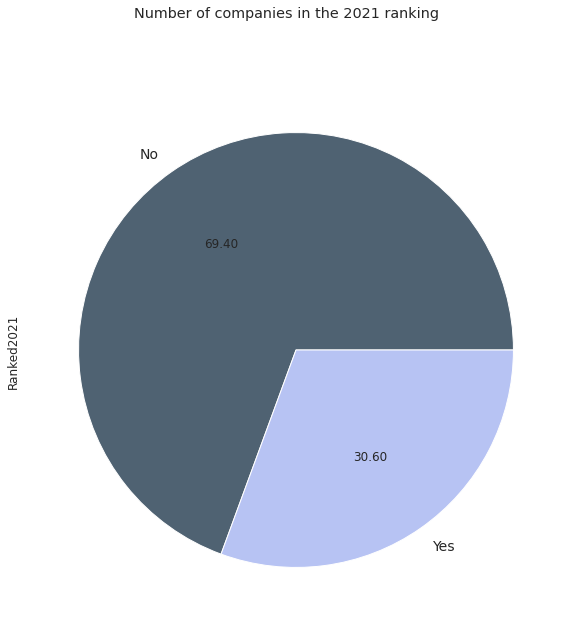

In [8]:
colors = ['#4F6272', '#B7C3F3']
df['Ranked2021'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Number of companies in the 2021 ranking', colors = ['#4F6272', '#B7C3F3'])
plt.show()

# 🟣Number of companies in the 2020 ranking🟣

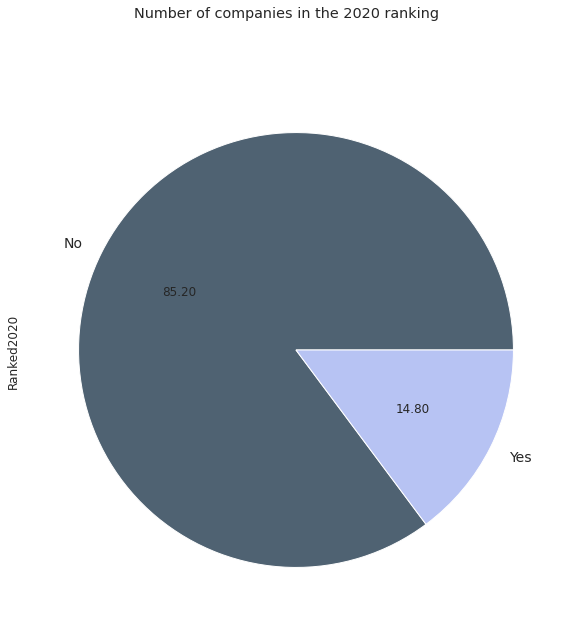

In [9]:
df['Ranked2020'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Number of companies in the 2020 ranking', colors = ['#4F6272', '#B7C3F3'])
plt.show()

# 🟣Сomparison of the number of companies in the ranking for 2020 and 2021🟣

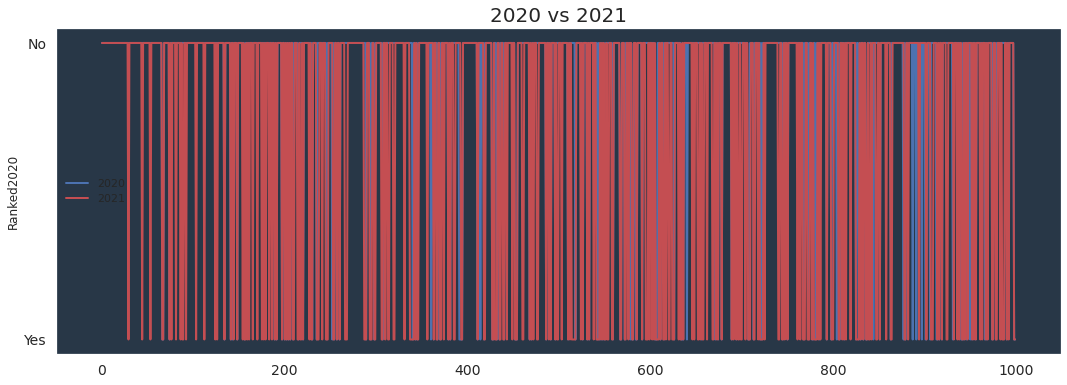

In [10]:
plt.figure(figsize=(18,6))
plt.title('2020 vs 2021',fontsize = 20)
sns.lineplot(data=df['Ranked2020'],linewidth = 2, label = '2020')
sns.lineplot(data=df['Ranked2021'],linewidth = 2, label = '2021', color='r')
plt.show()

# 🟣The most common countries🟣

In [11]:
fig = px.histogram(df, x='Country',color='Country',marginal='box',hover_data=df.columns,title= 'The most common countries', width=1000, height=500,template='plotly_dark')
fig.show()

# 🟣The most common sectors🟣

In [12]:
fig = px.histogram(df, x='Sector',color='Sector',marginal='box',hover_data=df.columns,title= 'The most common sectors', width=1000, height=500,template='plotly_dark')
fig.show()

# 🟣Distribution by year🟣

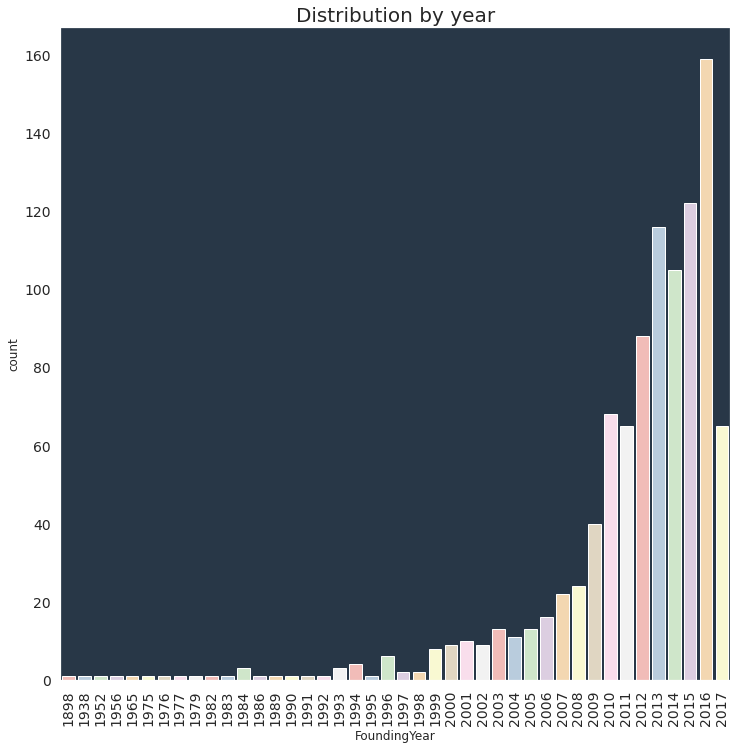

In [13]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='FoundingYear',palette='Pastel1')
plt.xticks(rotation=90)
plt.title('Distribution by year',fontsize = 20)
plt.show()

# 🟣The position of the CAGR relative to years🟣

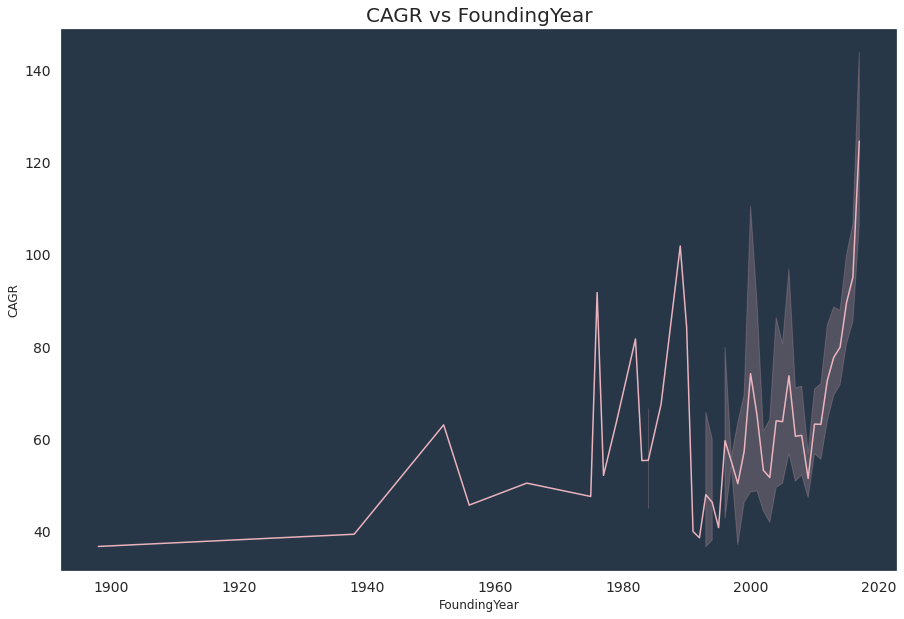

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='FoundingYear', y='CAGR', color='pink', alpha=0.9)
plt.title('CAGR vs FoundingYear',fontsize = 20)
plt.show()

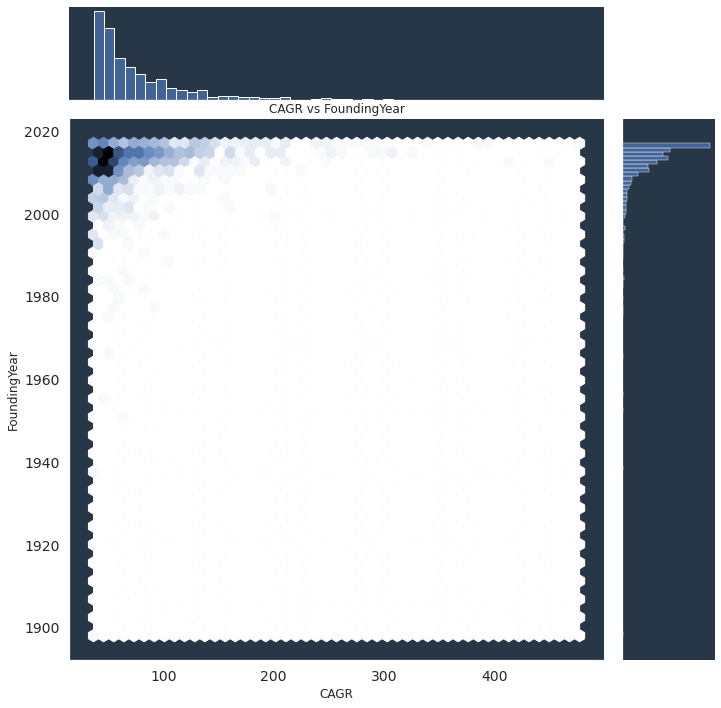

In [15]:
sns.jointplot(x='CAGR', y='FoundingYear', data=df , height = 10 , kind='hex')
plt.title('CAGR vs FoundingYear',fontsize = 12)
plt.show()

# 🟣Distribution of CAGR relative to country and sector🟣

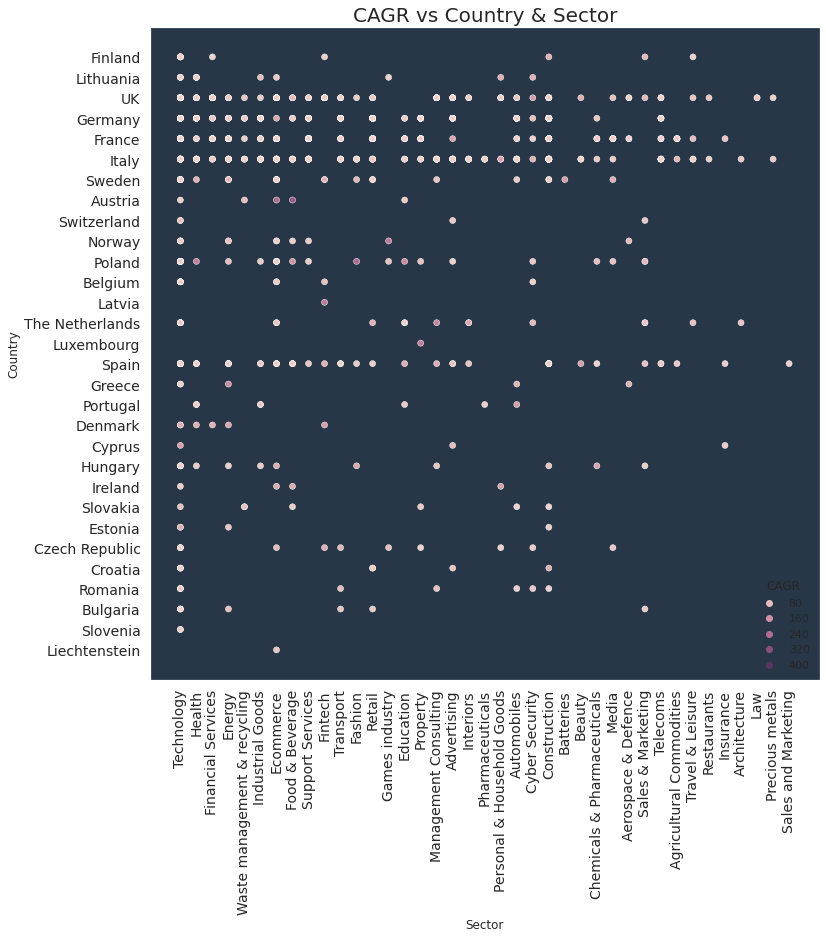

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Sector',y='Country',hue='CAGR',data=df)
plt.xticks(rotation=90)
plt.title('CAGR vs Сountry & Sector',fontsize = 20)
plt.show()

# 🟣Distribution of sectors relative to countries🟣

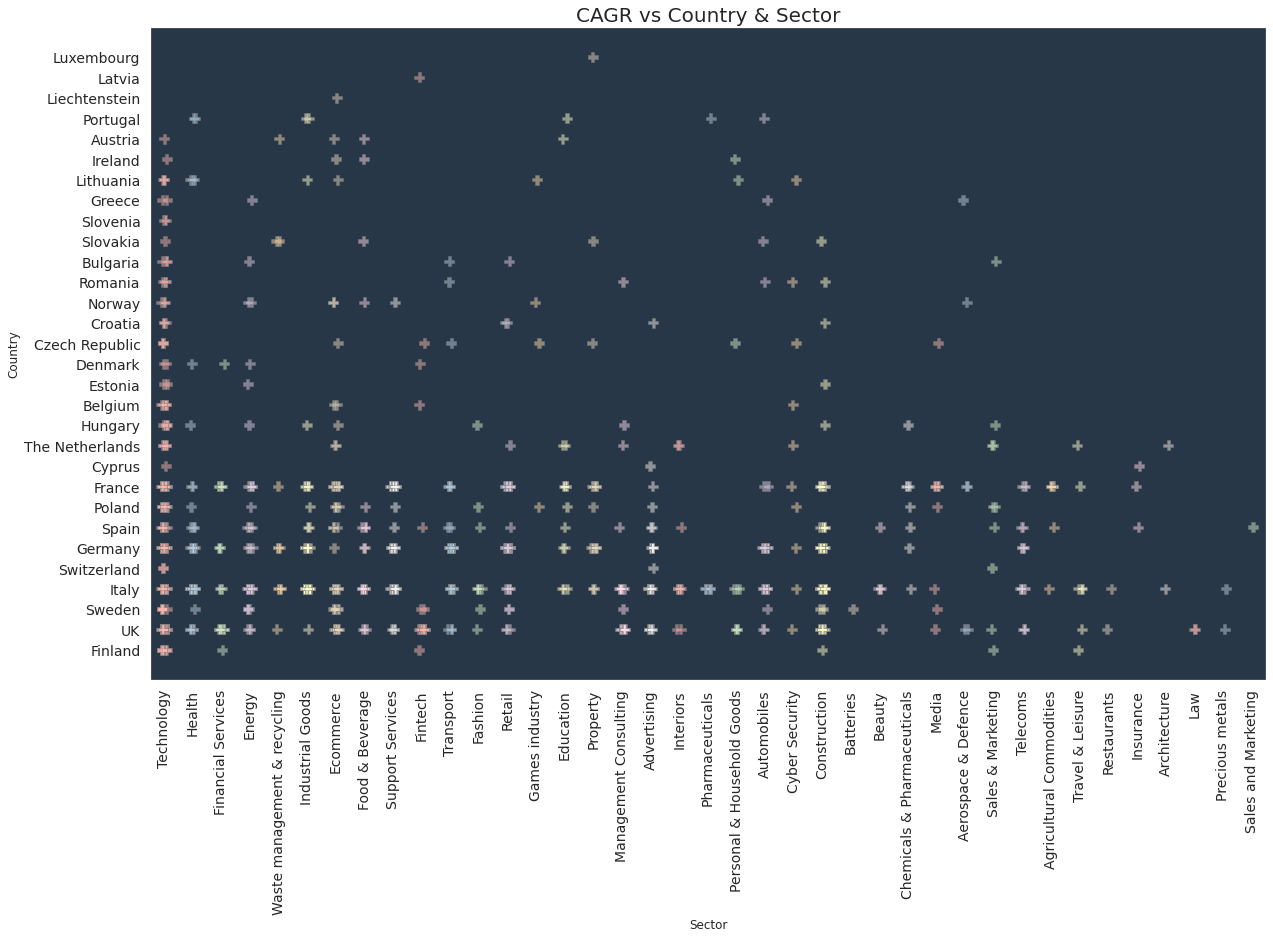

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
plt.xticks(rotation=90)
ax = sns.stripplot(y='Country', x='Sector', data=df, palette='Pastel1', s=10, marker='P', linewidth=1, alpha=0.5)
plt.title('CAGR vs Сountry & Sector',fontsize = 20)
plt.show()

# 🟣Revenue distribution relative to countries for 2020🟣

In [18]:
fig= px.histogram(df, x='Country',color='Country', y='Revenue2020',marginal='box',template='plotly_dark',hover_data=df.columns,title= 'Revenue distribution relative to countries for 2020', width=1000, height=500)
fig.show()

# 🟣Revenue distribution relative to countries for 2017🟣

In [19]:
fig= px.histogram(df, x='Country', color='Country', y='Revenue2017',marginal='box',template='plotly_dark',hover_data=df.columns,title= 'Revenue distribution relative to countries for 2017', width=1000, height=500)
fig.show()

# 🟣Distribution of income by sector for 2020🟣

In [20]:
fig= px.histogram(df, x='Sector', color='Sector',y='Revenue2020',marginal='box',template='plotly_dark',hover_data=df.columns,title= 'Sector revenues for 2020', width=1000, height=500)
fig.show()

# 🟣Distribution of income by sector for 2017🟣

In [21]:
fig= px.histogram(df, x='Sector', color='Sector',y='Revenue2017',marginal='box',template='plotly_dark',hover_data=df.columns,title= 'Sector revenues for 2017', width=1000, height=500)
fig.show()

# 🟣Revenue for 2020 relative to the country and sector🟣

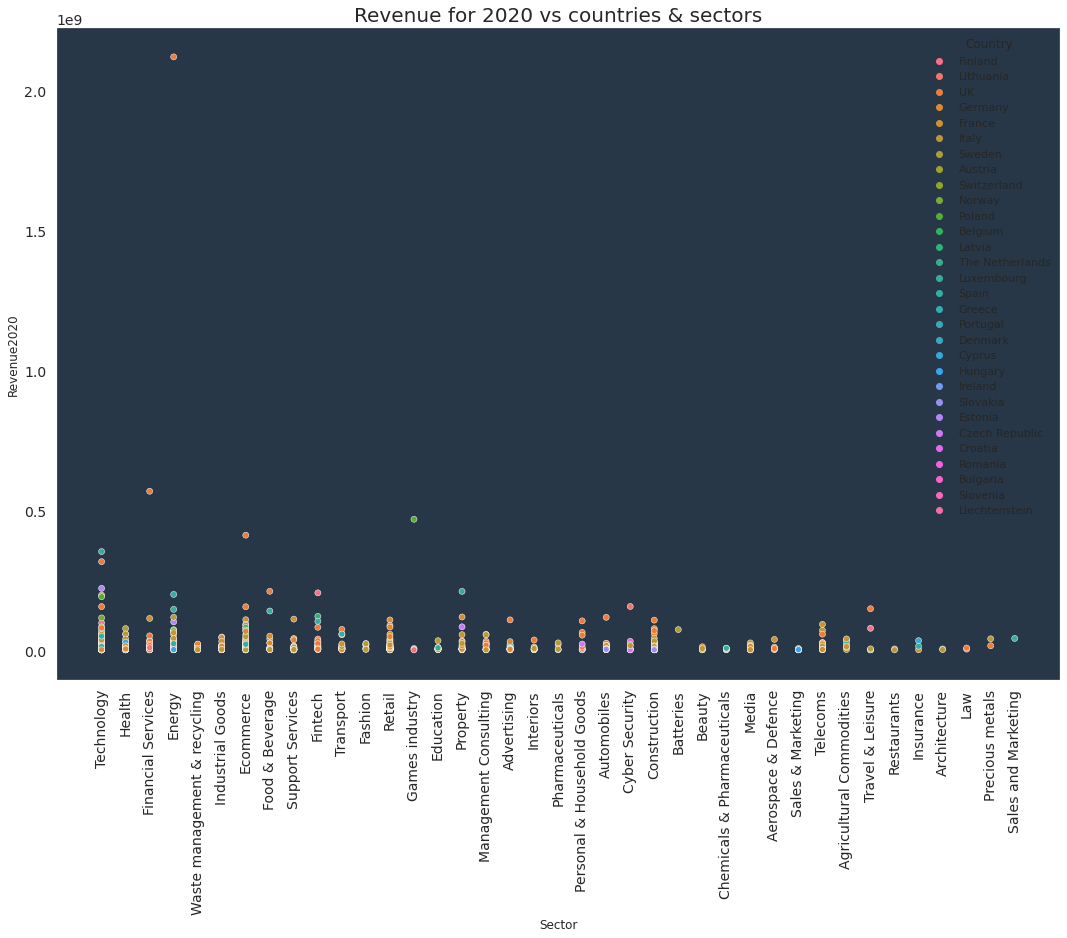

In [22]:
plt.figure(figsize=(18,12))
sns.scatterplot(data=df, x='Sector', y='Revenue2020', hue='Country', legend=True)
plt.xticks(rotation=90)
plt.title('Revenue for 2020 vs countries & sectors',fontsize = 20)
plt.show()

# 🟣Revenue for 2017 relative to the country and sector🟣

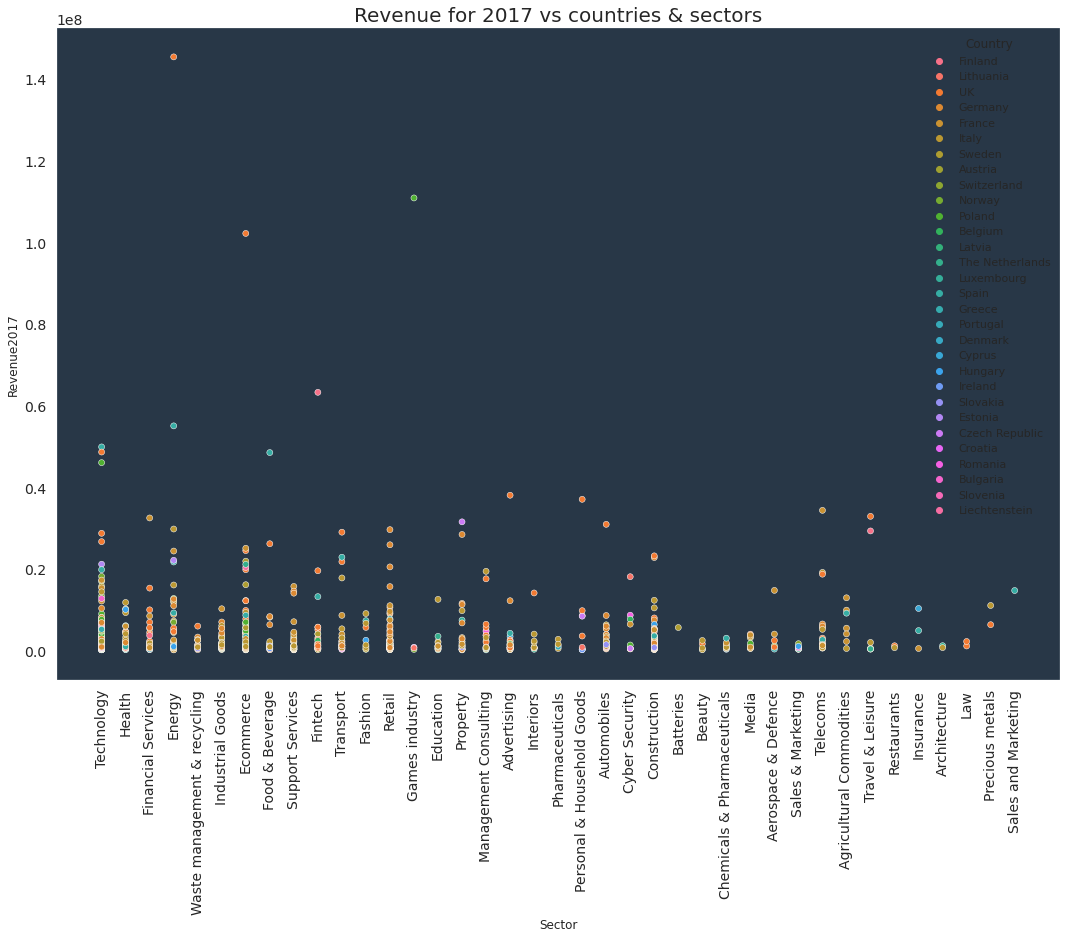

In [23]:
plt.figure(figsize=(18,12))
sns.scatterplot(data=df, x='Sector', y='Revenue2017', hue='Country', legend=True)
plt.xticks(rotation=90)
plt.title('Revenue for 2017 vs countries & sectors',fontsize = 20)
plt.show()

# 🟣CAGR vs Revenue2020🟣

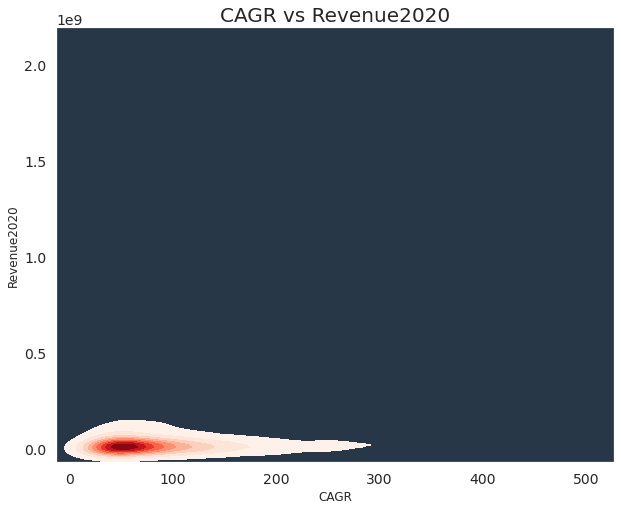

In [24]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['CAGR'],df['Revenue2020'],shade=True,cmap='Reds', shade_lowest=False)
plt.title('CAGR vs Revenue2020',fontsize = 20)
plt.show()

# 🟣CAGR vs Revenue2017🟣

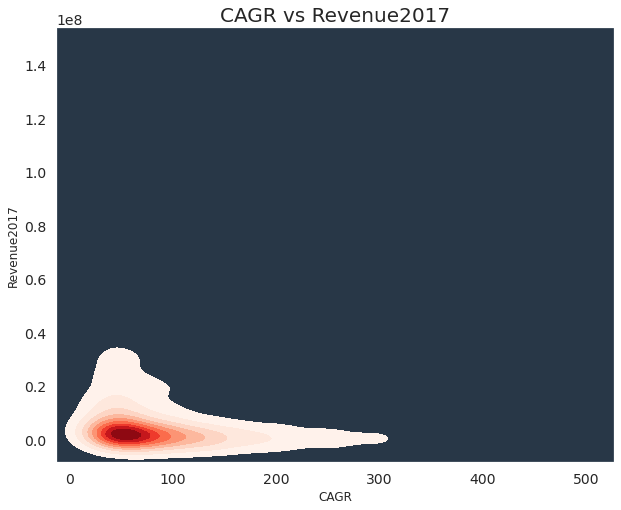

In [25]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['CAGR'],df['Revenue2017'],shade=True,cmap='Reds', shade_lowest=False)
plt.title('CAGR vs Revenue2017',fontsize = 20)
plt.show()

# 🌍Revenue distribution relative to countries for 2020 on the map🌍

In [26]:
fig=px.choropleth(data_frame=df,locations=df['Country'],locationmode='country names',color=df['Revenue2020'],animation_frame=df['FoundingYear'],animation_group=df['CAGR'] ,template='plotly_dark')
fig.update_layout(dict1={'title':'Revenue distribution relative to countries for 2020 on the map'})
fig.show() 

# 🌍Revenue distribution relative to countries for 2017 on the map🌍

In [27]:
fig=px.choropleth(data_frame=df,locations=df['Country'],locationmode='country names',color=df['Revenue2017'],animation_frame=df['FoundingYear'],animation_group=df['CAGR'],template='plotly_dark')
fig.update_layout(dict1={'title':'Revenue distribution relative to countries for 2017 on the map'})
fig.show()

# 🟣Distribution and analysis of the number of employees by sector in 2017🟣

In [28]:
fig = px.box(df, x='Sector', color='Sector', y='Employees2017', title='Distribution and analysis of the number of employees by sector in 2017', width=1200, height=600 ,template='plotly_dark')
fig.show()

# 🟣Distribution and analysis of the number of employees by sector in 2020🟣

In [29]:
fig = px.box(df, x='Sector', color='Sector', y='Employees2020', title= 'Distribution and analysis of the number of employees by sector in 2020', width=1200, height=600,template='plotly_dark')
fig.show()

# 🟣Сorrelations🟣

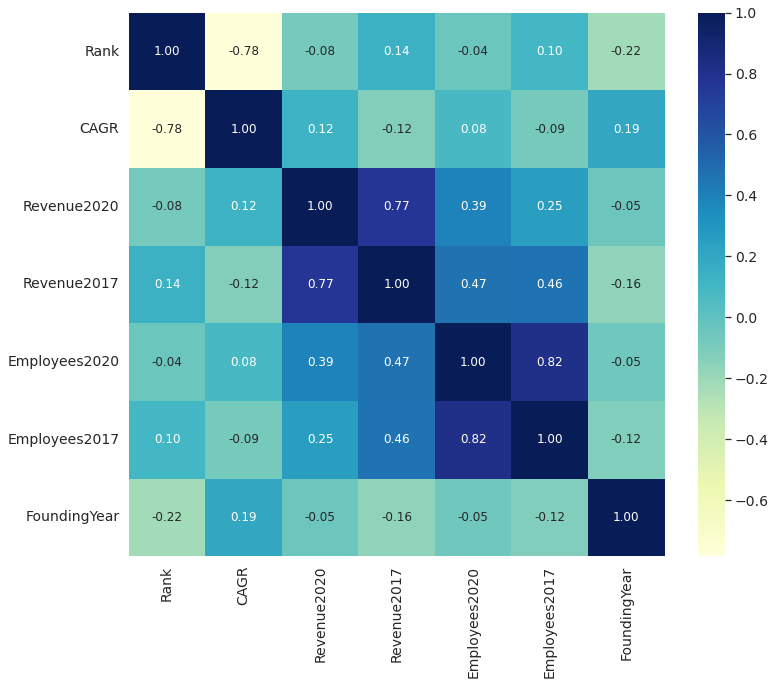

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')
plt.show()

# 🟣STOPWORDS🟣

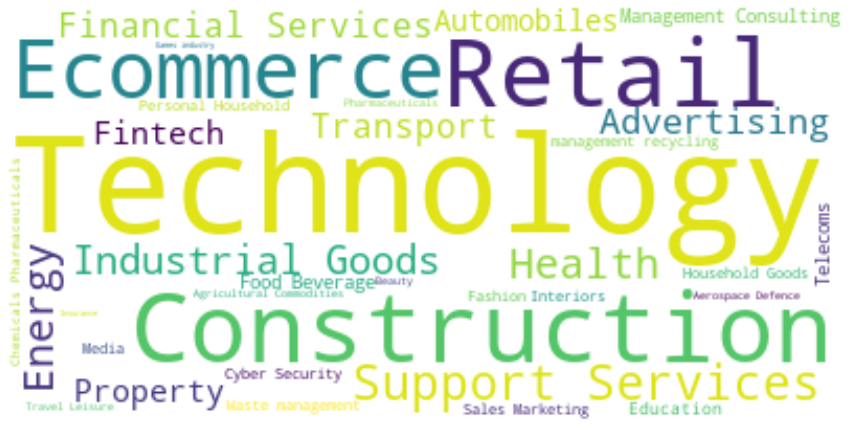

In [31]:
stopwords = set(STOPWORDS)
text = " ".join(df['Sector'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=70, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

# Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!